# Stock Investment for Beginners

## Introduction

This is a synthetic stock market dataset from Kaggle, containing 1,000 days of simulated stock data starting from January 1, 2022.

The dataset captures the daily stock behavior of multiple companies from diverse industries, including Technology, Finance, Healthcare, Energy, Consumer Goods, Automotive, and Aerospace.
Key fields include stock prices (Open, Close, High, Low), trading volume, P/E ratio, dividend yield, volatility, sentiment score, and a trend label (Bullish, Bearish, Stable).

This EDA aims to:
1. Clean and enhance the dataset for analysis
2. Standardize company-sector assignments
3. Analyze stock characteristics by sector and company
4. Generate investment recommendations tailored for short-term and long-term beginner investors.

### 1. Import and Load Data 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [2]:
# Read File
stock_df = pd.read_csv('/Users/xiejing/Desktop/Codeoptest/individual_project/synthetic_stock_data.csv')

### 2.  Initial Exploration: head, shape, columns, description, missing values,etc


In [ ]:
stock_df.shape

In [ ]:
stock_df.columns

In [ ]:
stock_df.head()

In [ ]:
stock_df.columns

In [ ]:
stock_df.describe()

In [ ]:
# To check if the format of this column is in datetime
stock_df.Date

In [ ]:
stock_df.Company.unique()

In [ ]:
stock_df.Sector.unique()

#### 2.1 DATA ISSUE -- THE SECTORS
Sectors are randomly assigned per row, so there's no reliable link between a company and a sector.

That makes it impossible to accurately sum Market_Cap or compare sectors, because one company might show up in different sectors across different rows.

So I did a remapping for the companies' sector

In [ ]:
# Check how many sectors each company appears in
company_sector_counts = stock_df.groupby('Company')['Sector'].nunique()
print(company_sector_counts.sort_values(ascending=False).head())


In [116]:
# Use mode (most common) sector for each company
company_sector_map = stock_df.groupby('Company')['Sector'].agg(lambda x: x.mode()[0])


In [117]:
stock_df['Sector'] = stock_df['Company'].map(company_sector_map)


In [ ]:
# Validate: now each company should appear in only one sector
stock_df.groupby('Company')['Sector'].nunique().max()
# Should return 1 ✅


In [ ]:
# This creates a Series showing how many unique sectors each company appears in.

company_sector_counts = stock_df.groupby('Company')['Sector'].nunique()

print(company_sector_counts)

In [ ]:
all_unique = company_sector_counts.max() == 1
print("✅ All companies have a single sector assigned." if all_unique else "❌ Some companies still have multiple sectors.")


In [ ]:
# Set pandas to show all rows (or increase limit)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Now print the full mapping
company_sector_map = stock_df.groupby('Company')['Sector'].first().sort_index()
print(company_sector_map)



In [ ]:
# Define the corrected mapping based on the requested sector list
custom_sector_map = {
    'AMD': 'Technology',
    'Adobe': 'Technology',
    'Airbus': 'Aerospace',
    'Alibaba': 'Technology',
    'Amazon': 'Technology',
    'Apple': 'Technology',
    'AstraZeneca': 'Healthcare',
    'BMW': 'Automotive',
    'BP': 'Energy',
    'Bank of America': 'Finance',
    'Boeing': 'Aerospace',
    'Chevron': 'Energy',
    'Citigroup': 'Finance',
    'ExxonMobil': 'Energy',
    'Ferrari': 'Automotive',
    'Ford': 'Automotive',
    'General Motors': 'Automotive',
    'Gilead Sciences': 'Healthcare',
    'Goldman Sachs': 'Finance',
    'Google': 'Technology',
    'HSBC': 'Finance',
    'Honda': 'Automotive',
    'IBM': 'Technology',
    'Intel': 'Technology',
    'JPMorgan Chase': 'Finance',
    'Johnson & Johnson': 'Healthcare',
    'LG': 'Technology',
    'Lamborghini': 'Automotive',
    'Lockheed Martin': 'Aerospace',
    'Lyft': 'Technology',
    'MasterCard': 'Finance',
    'Mercedes-Benz': 'Automotive',
    'Meta': 'Technology',
    'Microsoft': 'Technology',
    'Moderna': 'Healthcare',
    'Morgan Stanley': 'Finance',
    'Netflix': 'Technology',
    'Northrop Grumman': 'Aerospace',
    'Novartis': 'Healthcare',
    'Nvidia': 'Technology',
    'Oracle': 'Technology',
    'Panasonic': 'Consumer Goods',
    'PayPal': 'Technology',
    'Pfizer': 'Healthcare',
    'Porsche': 'Automotive',
    'Raytheon': 'Aerospace',
    'Roche': 'Healthcare',
    'Salesforce': 'Technology',
    'Samsung': 'Technology',
    'Shell': 'Energy',
    'Snapchat': 'Technology',
    'Sony': 'Consumer Goods',
    'SpaceX': 'Aerospace',
    'Spotify': 'Technology',
    'Square': 'Technology',
    'Tencent': 'Technology',
    'Tesla': 'Automotive',
    'TotalEnergies': 'Energy',
    'Toyota': 'Automotive',
    'Twitter': 'Technology',
    'Uber': 'Technology',
    'Visa': 'Finance',
    'Wells Fargo': 'Finance'
}

# Apply the mapping to the dataset
stock_df['Sector'] = stock_df['Company'].map(custom_sector_map)


In [ ]:
# Save the updated dataset with remapped sectors to a new CSV file
output_path = "/Users/xiejing/Desktop/Codeoptest/individual_project/synthetic_stock_data_remap.csv"
stock_df.to_csv(output_path, index=False)

output_path


#### 2.2 DATA ISSUE -- THE CLOSE and OPEN
These two columns are showing the same figures, so I decided  to use "HIGH" and "LOW" instead. 

In [ ]:
print(stock_df[['Open', 'Close']].head(10))
print((stock_df['Close'] - stock_df['Open']).describe())


### Goal	Use This
Intraday volatility ----------	(High - Low) / Low
Daily directional movement ---	pct_change(Close)
Trend over time	-------         Close line chart
Momentum	-----               Moving Average of Close
Total growth trajectory	-----   Cumulative return from Close

###  3. Volatility Profiling

In [ ]:
volatility_by_sector = stock_df.groupby('Sector')['Volatility'].mean().sort_values(ascending=False)
print(volatility_by_sector)


In [ ]:
stock_df.groupby('Company')[['Volatility', 'Volume']].mean().sort_values(by='Volatility')


In [ ]:
#### volume_by_sector 
volume_by_sector = stock_df.groupby('Sector')['Volume'].sum().sort_values(ascending=False)
print(volume_by_sector)

volume_by_sector.plot(kind='bar', figsize=(10,5), title='Total Trading Volume by Sector')
plt.ylabel('Total Volume')
plt.show()

### 4. Sentiment vs Trend Correlation

In [ ]:
stock_df['Is_Bullish'] = (stock_df['Trend'] == 'bullish').astype(int)
stock_df[['Sentiment_Score', 'Is_Bullish']].corr()

# This is very close to 0, which means, there is virtually no relationship between the sentiment score and whether a day is labeled as bullish in this dataset.


### 5. Dividend Yield Screening

In [ ]:
div_yield_ranking = stock_df.groupby('Company')['Dividend_Yield'].mean().sort_values(ascending=False)

print(div_yield_ranking)

### 6. PE Ratio Assessment

In [183]:
pe_by_sector = stock_df.groupby('Sector')['PE_Ratio'].mean().sort_values()

print(pe_by_sector)

Sector
Consumer Goods    20.247996
Healthcare        22.362825
Aerospace         22.499242
Automotive        22.551662
Finance           22.838387
Technology        22.968955
Energy            24.848918
Name: PE_Ratio, dtype: float64


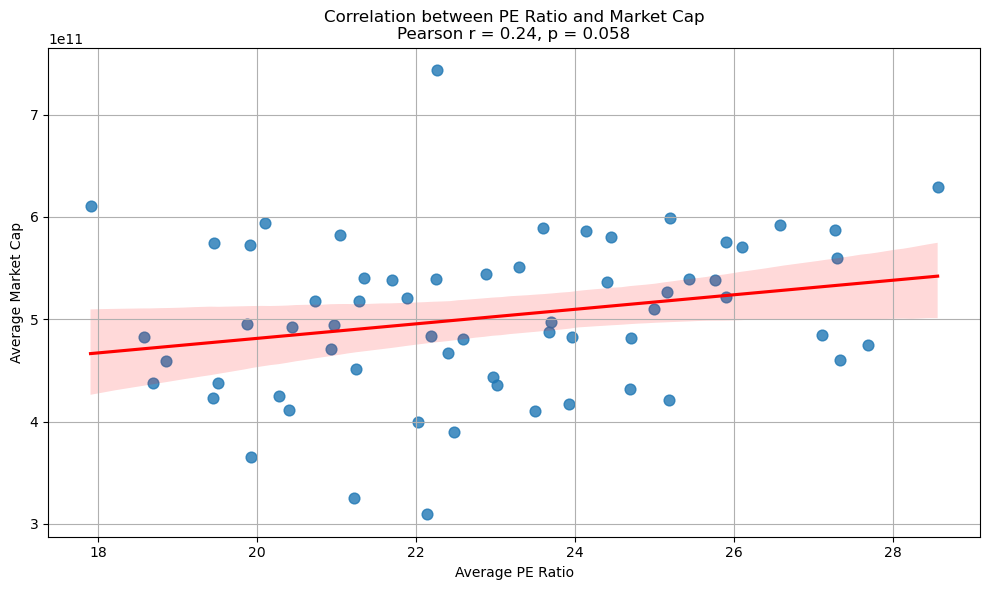

In [185]:
# Re-run code after state reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr



# Group by company to calculate average PE Ratio and average Market Cap
company_stats = stock_df.groupby("Company")[["PE_Ratio", "Market_Cap"]].mean().reset_index()

# Calculate correlation
correlation, p_value = pearsonr(company_stats["PE_Ratio"], company_stats["Market_Cap"])

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.regplot(x="PE_Ratio", y="Market_Cap", data=company_stats, scatter_kws={'s': 60}, line_kws={'color': 'red'})
plt.title(f"Correlation between PE Ratio and Market Cap\nPearson r = {correlation:.2f}, p = {p_value:.3f}")
plt.xlabel("Average PE Ratio")
plt.ylabel("Average Market Cap")
plt.grid(True)
plt.tight_layout()
plt.show()


### 7. Bullish Frequency / Streaks

In [ ]:
stock_df['Is_Bullish'] = (stock_df['Trend'] == 'bullish').astype(int)
bullish_days = stock_df.groupby('Company')['Is_Bullish'].sum().sort_values(ascending=False)

print(bullish_days)

## 9. Balanced Allocation 

In [ ]:
import matplotlib.pyplot as plt

# Data for the balanced portfolio
labels = [
    'Core / Stable (45%)',
    'Income Generator (25%)',
    'Growth-Oriented (15%)',
    'Speculative / High-Risk (10%)',
    'Declining Trend (Put Play, 5%)'
]
sizes = [45, 25, 15, 10, 5]

# Colors (can be customized)
colors = ['#4daf4a', '#377eb8', '#ff7f00', '#e41a1c', '#984ea3']

# Create pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, startangle=90, autopct='%1.0f%%', textprops={'fontsize': 10})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Balanced Portfolio Allocation for Beginners', fontsize=14)
plt.tight_layout()

plt.show()


## 9. Randomly Pick Stocks(Company Names) from Different 5 Types 

### 9.1 The formula to pick

In [ ]:
# We'll now:
# 1. Aggregate data per company
# 2. Apply the Stock Type classification logic
# 3. Sample one company per Stock Type
# 4. Allocate fund and visualize

# Step 1: Aggregate median values per company
agg_df = stock_df.groupby("Company").agg({
    "PE_Ratio": "median",
    "Volatility": "median",
    "Dividend_Yield": "median",
    "Trend": lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]  # most common trend
}).reset_index()

# Step 2: Classify Stock Type
def classify_stock(row):
    if row["Trend"] != "bullish" and row["Trend"] != "stable":
        return "Declining / Put Play"
    elif row["PE_Ratio"] > 25 and row["Volatility"] > 0.03 and row["Dividend_Yield"] > 0.03:
        return "Speculative / High-Risk"
    elif row["PE_Ratio"] <= 24 and row["Dividend_Yield"] >= 0.025 and row["Volatility"] < 0.024:
        return "Income Generator"
    elif row["PE_Ratio"] >= 25 or row["Volatility"] > 0.03:
        return "Growth-Oriented"
    else:
        return "Core / Stable"

agg_df["Stock Type"] = agg_df.apply(classify_stock, axis=1)

# Step 3: Sample one company from each stock type
sampled = agg_df.groupby("Stock Type", group_keys=False).apply(lambda x: x.sample(1))


# Sample 2 companies each for Core / Stable and Income Generator
core_sample = agg_df[agg_df["Stock Type"] == "Core / Stable"].sample(2, random_state=42)
income_sample = agg_df[agg_df["Stock Type"] == "Income Generator"].sample(2, random_state=42)

# Sample 1 for each of the other types
other_types = ["Growth-Oriented", "Speculative / High-Risk", "Declining / Put Play"]
other_samples = agg_df[agg_df["Stock Type"].isin(other_types)].groupby("Stock Type", group_keys=False).apply(lambda x: x.sample(1))

# Combine all samples
multi_sampled = pd.concat([core_sample, income_sample, other_samples], ignore_index=True)


# Step 4: Add fund allocation
allocation_pct_multi = {
    "Core / Stable": 22.5,  # 45% / 2
    "Income Generator": 12.5,  # 25% / 2
    "Growth-Oriented": 15,
    "Speculative / High-Risk": 10,
    "Declining / Put Play": 5
}

# Map allocation per company
multi_sampled["Allocation (%)"] = multi_sampled["Stock Type"].map(allocation_pct_multi)
multi_sampled["Allocated ($)"] = multi_sampled["Allocation (%)"] * total_fund / 100

multi_sampled


### 9.2 The formula to pick (to prove different results from the previous lines) and the plots


In [ ]:

# Aggregate median values per company
agg_df = stock_df.groupby("Company").agg({
    "PE_Ratio": "median",
    "Volatility": "median",
    "Dividend_Yield": "median",
    "Trend": lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]
}).reset_index()

# Classification function
def classify_stock(row):
    if row["Trend"] != "bullish" and row["Trend"] != "stable":
        return "Declining / Put Play"
    elif row["PE_Ratio"] > 25 and row["Volatility"] > 0.03 and row["Dividend_Yield"] > 0.03:
        return "Speculative / High-Risk"
    elif row["PE_Ratio"] <= 24 and row["Dividend_Yield"] >= 0.025 and row["Volatility"] < 0.024:
        return "Income Generator"
    elif row["PE_Ratio"] >= 25 or row["Volatility"] > 0.03:
        return "Growth-Oriented"
    else:
        return "Core / Stable"

agg_df["Stock Type"] = agg_df.apply(classify_stock, axis=1)

# Sample 2 each for Core / Stable and Income Generator
core_sample = agg_df[agg_df["Stock Type"] == "Core / Stable"].sample(2, random_state=42)
income_sample = agg_df[agg_df["Stock Type"] == "Income Generator"].sample(2, random_state=42)

# Sample 1 each for other types
other_types = ["Growth-Oriented", "Speculative / High-Risk", "Declining / Put Play"]
other_samples = agg_df[agg_df["Stock Type"].isin(other_types)].groupby("Stock Type", group_keys=False).apply(lambda x: x.sample(1))

# Combine all samples
multi_sampled = pd.concat([core_sample, income_sample, other_samples], ignore_index=True)

# Assign allocation
allocation_pct_multi = {
    "Core / Stable": 22.5,
    "Income Generator": 12.5,
    "Growth-Oriented": 15,
    "Speculative / High-Risk": 10,
    "Declining / Put Play": 5
}
total_fund = 50000

multi_sampled["Allocation (%)"] = multi_sampled["Stock Type"].map(allocation_pct_multi)
multi_sampled["Allocated ($)"] = multi_sampled["Allocation (%)"] * total_fund / 100

# Create pie chart with same color per stock type
labels = multi_sampled["Company"] + "\n(" + multi_sampled["Stock Type"] + ")"
sizes = multi_sampled["Allocated ($)"]
percent_labels = sizes / sizes.sum() * 100
formatted_labels = [f"{label}\n${value:,.0f} ({pct:.1f}%)" for label, value, pct in zip(labels, sizes, percent_labels)]

stock_type_colors = {
    "Core / Stable": "#4CAF50",
    "Income Generator": "#2196F3",
    "Growth-Oriented": "#FFC107",
    "Speculative / High-Risk": "#FF5722",
    "Declining / Put Play": "#9C27B0"
}
colors = multi_sampled["Stock Type"].map(stock_type_colors).tolist()

plt.figure(figsize=(9, 9))
plt.pie(
    sizes,
    labels=formatted_labels,
    startangle=140,
    counterclock=False,
    wedgeprops=dict(width=0.4, edgecolor='white'),
    colors=colors
)
plt.title("Balanced Portfolio Allocation ($50,000)", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()
